# Environment

In [21]:
import numpy as np
import json
from datetime import datetime
from sklearn.linear_model import LinearRegression
import sys
import matplotlib.pyplot as plt

# Data Loading

In [4]:
data_path = "../scrape/data/data.npy"
dates_path = "../scrape/data/dates.json"
tweets_path = "../scrape/data/tweets.json"

data = np.load(data_path)

with open(dates_path) as json_file:  
    dates = json.load(json_file)
    
with open(tweets_path) as json_file:  
    tweets = json.load(json_file)

# Matching

This method is, as explained in Shalizi 24, essentially just nearest neighbor regression. For each data pt x = (X=a, Z, Y), we need to find x' = (X'=b, Z', Y'), such that some notion of distance, |Z' - Z| is minimized. Then, we need to take the average of Y' - Y for each of these x, x' combos. This is an unbiased estimate of the difference, E[Y|do(X=a)] - E[Y | do(X=b)].

In [5]:
def find_closest(data, j, do_x_2):
    vec = data[j,:]
    
    smallest = sys.float_info.max
    index = None
    
    for i in range(len(data)):
        if data[i, data.shape[1]-2] == do_x_2:
            distance = np.linalg.norm( data[i, 0:data.shape[1]-1] - vec[0:vec.shape[0]-1] )
            if distance < smallest:
                smallest = distance
                index = i
    
    if index == None:
        return None
    
    
    return data[index, data.shape[1]-1]

In [8]:
def average_treatment_estimation_matching(data, do_x_1, do_x_2):
    num= 0
    total= 0
    
    for i in range(len(data)):
        if data[i, data.shape[1]-2] == do_x_1:
            num= num + 1
            y_1 = data[i, data.shape[1]-1]
            total_add = find_closest(data, i, do_x_2) - y_1
            total = total + total_add
    
    total = total/num
    
    return total

# Testing

In [17]:
do_x_1 = 0
do_x_2 = 1

ATE_matching = average_treatment_estimation_matching(data, do_x_1, do_x_2)

In [18]:
ATE_matching

-0.24843698770851586

# Analysis

In [19]:
ATE_estimates = []

for i in range(1, 10):
    ATE_estimates.append(average_treatment_estimation_matching(data, 0, i))

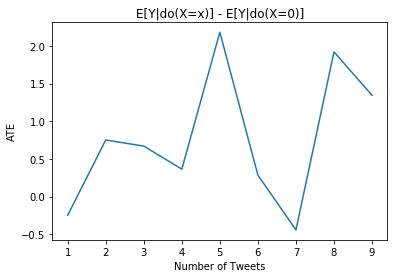

In [24]:
plt.plot(range(1, 10), ATE_estimates)
plt.ylabel('ATE')
plt.xlabel('Number of Tweets')
plt.title(r'E[Y|do(X=x)] - E[Y|do(X=0)]')
plt.show()